In [395]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [396]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [397]:
path = '/content/drive/MyDrive/Datasets/Country-data.csv'

df = pd.read_csv(path)

In [398]:
df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [400]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [401]:
df.duplicated(subset = ['country']).sum()

0

In [402]:
df.shape

(167, 10)

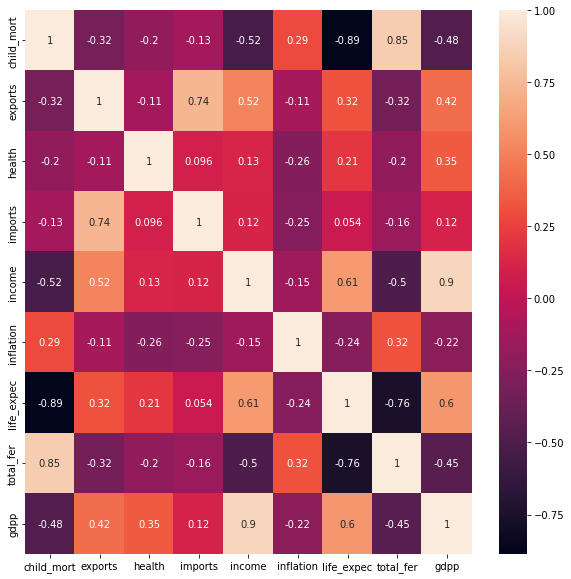

In [403]:
plt.figure(figsize = (10,10))       
sns.heatmap(df.corr(),annot = True)

In [404]:
Y=df['country']
X=df.drop('country',axis =1)


**PCA**

In [405]:
num_list = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
def scale_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)

    X -= mean
    X /= std

    return (X)

In [406]:
scale_features(X)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [407]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [408]:
def PCA(X, n_comp):
  X = X - np.mean(X , axis = 0)
  cov_mat = np.cov(X.T)
  eig_values, eig_vectors = np.linalg.eig(cov_mat)
  eig_vectors = eig_vectors.T
  index = np.argsort(eig_values)[::-1]
  eig_values = eig_values[index]
  eig_vectors = eig_vectors[index]
  comp=eig_vectors[0:n_comp]
  X_transformed=np.dot(X, comp.T)
     
  return X_transformed,eig_values,eig_vectors

In [409]:
X_pca,eig_values,eig_vectors=PCA(X, 4)

In [410]:
eig_vals_total = sum(eig_values)
explained_variance = [(i / eig_vals_total)*100 for i in eig_values]
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

Explained variance: [45.95173978609591, 17.181625651618198, 13.004258896953063, 11.053161805571916, 7.340211424156048, 2.4842346764277465, 1.260430398165027, 0.9812817379261464, 0.7430556230859512]
Cumulative explained variance: [ 45.95173979  63.13336544  76.13762433  87.19078614  94.53099756
  97.01523224  98.27566264  99.25694438 100.        ]


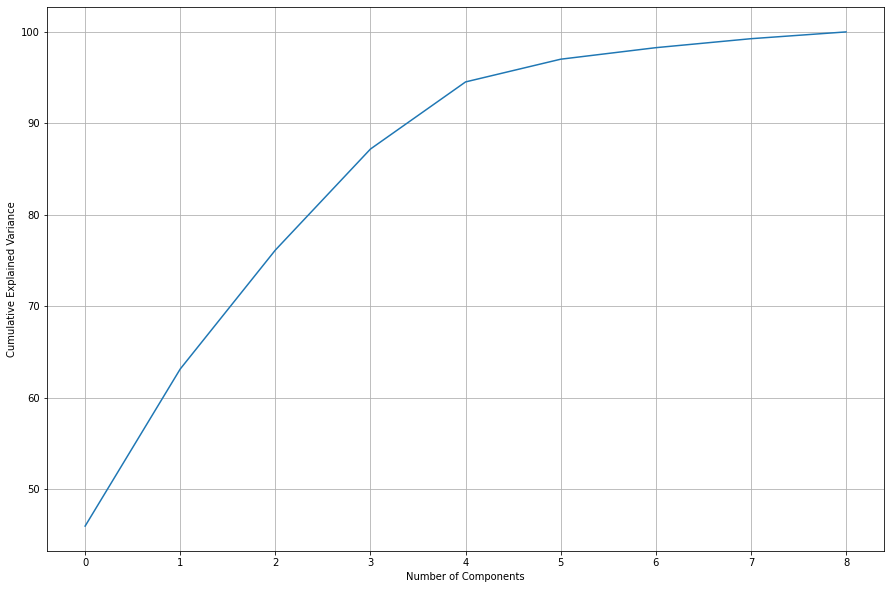

In [411]:
fig = plt.figure(figsize = (15,10))
plt.plot(cum_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

after pc=4 there is not much gain in variance

hence, pc=4 with 95% variance

In [412]:
X_pca

array([[ 2.91302459e+00, -9.56205755e-02,  7.18118495e-01,
        -1.00525464e+00],
       [-4.29911330e-01,  5.88155666e-01,  3.33485505e-01,
         1.16105859e+00],
       [ 2.85225077e-01,  4.55174413e-01, -1.22150481e+00,
         8.68114503e-01],
       [ 2.93242265e+00, -1.69555507e+00, -1.52504374e+00,
        -8.39625014e-01],
       [-1.03357587e+00, -1.36658709e-01,  2.25720917e-01,
         8.47062687e-01],
       [-2.24072616e-02,  1.77918658e+00, -8.69997116e-01,
         3.69668667e-02],
       [ 1.01583737e-01,  5.68251724e-01, -2.42091816e-01,
         1.46626576e+00],
       [-2.34216461e+00,  1.98845915e+00, -1.90344188e-01,
        -1.10503778e+00],
       [-2.97376366e+00,  7.34688659e-01,  5.19766356e-01,
        -1.20544210e+00],
       [ 1.81486997e-01,  4.02865873e-01, -8.67458743e-01,
         4.38772983e-01],
       [-1.26874386e+00,  6.56588363e-01,  4.88097616e-01,
        -5.56335553e-02],
       [-1.67099640e+00, -5.61162493e-01, -9.91258303e-01,
      

In [413]:
pca_df = pd.DataFrame(X_pca,columns = ['PC1', 'PC2','PC3','PC4'])


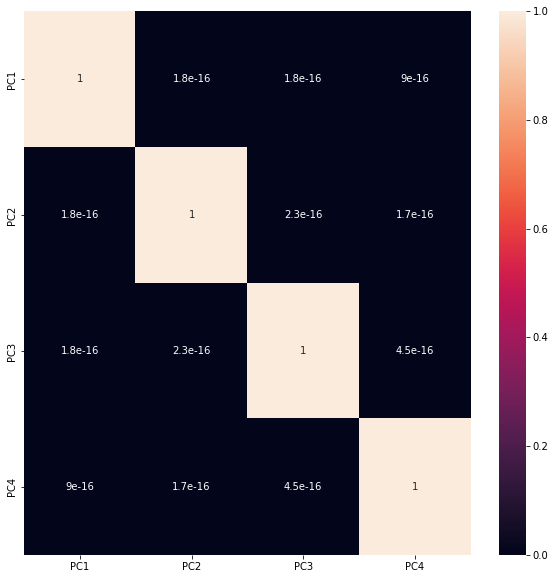

In [414]:
plt.figure(figsize = (10,10))
sns.heatmap(pca_df.corr(),annot = True)
plt.show()

In [415]:
country = pd.DataFrame(Y)
pca_df = pd.concat([country, pca_df], axis=1)
pca_df

,country,PC1,PC2,PC3,PC4
0,Afghanistan,2.913025,-0.095621,0.718118,-1.005255
1,Albania,-0.429911,0.588156,0.333486,1.161059
2,Algeria,0.285225,0.455174,-1.221505,0.868115
3,Angola,2.932423,-1.695555,-1.525044,-0.839625
4,Antigua and Barbuda,-1.033576,-0.136659,0.225721,0.847063
...,...,...,...,...,...
162,Vanuatu,0.820631,-0.639570,0.389923,0.706595
163,Venezuela,0.551036,1.233886,-3.101350,0.115311
164,Vietnam,-0.498524,-1.390744,0.238526,1.074098
165,Yemen,1.887451,0.109453,-1.109752,-0.056257


**Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

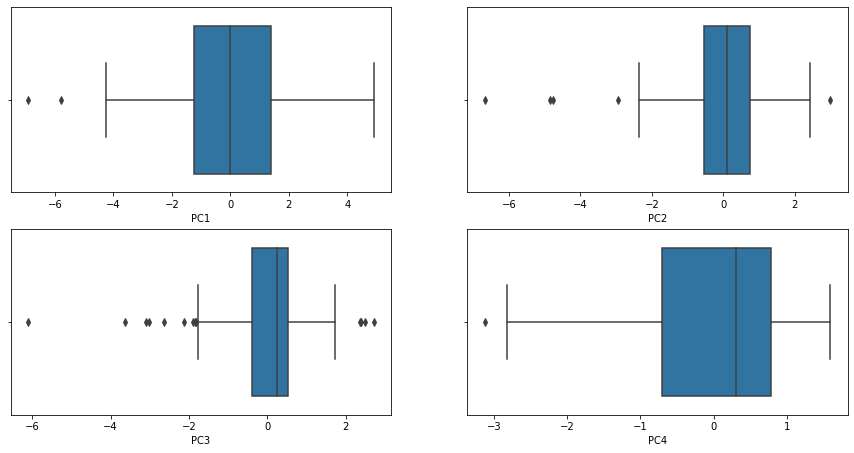

In [439]:
fig, axs = plt.subplots(2,2, figsize = (15,7.5))

plt1 = sns.boxplot(pca_df['PC1'], ax = axs[0,0])
plt2 = sns.boxplot(pca_df['PC2'], ax = axs[0,1])
plt3 = sns.boxplot(pca_df['PC3'], ax = axs[1,0])
plt4 = sns.boxplot(pca_df['PC4'], ax = axs[1,1])

**K Means**

Elbow method and Silhouette score

In [416]:
import random

In [417]:
from sklearn.cluster import KMeans

wcss = []
for num_clusters in list(range(1,11)):
    model = KMeans(n_clusters = num_clusters, max_iter=50)
    model.fit(X_pca)
    wcss.append(model.inertia_)

Text(0, 0.5, 'WCSS')

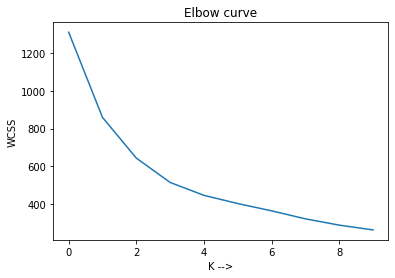

In [418]:
x = np.arange(10)
plt.plot(x,wcss)
plt.title("Elbow curve")
plt.xlabel("K -->")
plt.ylabel("WCSS")

In [419]:
from sklearn.metrics import silhouette_score


for k in range(2,11):
    
  
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    
    sil_score = silhouette_score(X_pca, kmeans.labels_)
    print("For clusters={0}, silhouette score = {1}".format(k, sil_score))

For clusters=2, silhouette score = 0.33693444224290436
For clusters=3, silhouette score = 0.3340859524580049
For clusters=4, silhouette score = 0.35221708432935933
For clusters=5, silhouette score = 0.28511618045640774
For clusters=6, silhouette score = 0.28922846153798265
For clusters=7, silhouette score = 0.28465221189034234
For clusters=8, silhouette score = 0.27018462667123316
For clusters=9, silhouette score = 0.2534633714870738
For clusters=10, silhouette score = 0.2592597196585956


K-Means

In [420]:
def euc_distance(X1, X2):
    return(sum((X1 - X2)**2))**0.5

In [421]:
def find_clusters(X,in_c):
    assigned_centroid = []
    for i in X:
        distance=[]
        for j in in_c:
            distance.append(euc_distance(i, j))
        assigned_centroid.append(np.argmin(distance))
    return assigned_centroid

In [422]:
def calc_centroids(X,clusters):
    new_centroids = []
    new_df = pd.concat([pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
                      axis=1)
    for c in set(new_df['cluster']):
        current_cluster = new_df[new_df['cluster'] == c][new_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids

In [423]:
cent_pos = random.sample(range(0, len(X)), 4)

In [424]:
initial_centroids = []
for i in cent_pos:
    initial_centroids.append(X_pca[i])

In [425]:
in_c = np.array(initial_centroids)
in_c

array([[ 1.77358023, -1.05339867,  2.39044031, -1.17956908],
       [-0.11784622, -0.36103114,  0.04667232,  0.94683863],
       [-0.42991133,  0.58815567,  0.3334855 ,  1.16105859],
       [-0.12114612,  1.76890914,  0.24560589,  0.71520887]])

In [ ]:
clusters = find_clusters(X_pca,initial_centroids)
clusters

In [427]:
centroids = initial_centroids
for i in range(20):
    cluster = find_clusters( X_pca,centroids)
    centroids = calc_centroids(X_pca,cluster)

In [428]:
cluster

[0,
 1,
 1,
 0,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 3,
 1,
 0,
 0,
 1,
 0,
 3,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 3,
 3,
 0,
 0,
 1,
 3,
 0,
 3,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 1,
 1,
 1,
 0,
 3,
 3,
 3,
 1,
 3,
 1,
 1,
 0,
 0,
 3,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 3,
 3,
 0,
 0,
 3,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 3,
 0,
 0,
 3,
 3,
 1,
 1,
 0,
 1,
 3,
 3,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 0,
 0]

In [429]:
ClusterID  = pd.DataFrame(cluster)
df_pca_km = pd.concat([pca_df,ClusterID], axis=1)
df_pca_km.columns=['Country','PC1', 'PC2', 'PC3', 'PC4', 'ClusterID']
df_pca_km

,Country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,2.913025,-0.095621,0.718118,-1.005255,0
1,Albania,-0.429911,0.588156,0.333486,1.161059,1
2,Algeria,0.285225,0.455174,-1.221505,0.868115,1
3,Angola,2.932423,-1.695555,-1.525044,-0.839625,0
4,Antigua and Barbuda,-1.033576,-0.136659,0.225721,0.847063,1
...,...,...,...,...,...,...
162,Vanuatu,0.820631,-0.639570,0.389923,0.706595,1
163,Venezuela,0.551036,1.233886,-3.101350,0.115311,1
164,Vietnam,-0.498524,-1.390744,0.238526,1.074098,1
165,Yemen,1.887451,0.109453,-1.109752,-0.056257,0


In [432]:
for k in range(0,4):
  k_Means_countries = df[df_pca_km['ClusterID'] == k]
  print("For Cluster=",k,k_Means_countries.country.unique())

For Cluster= 0 ['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
For Cluster= 1 ['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belize' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria'
 'Cambodia' 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Czech Republic' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Estonia' 'Fiji' 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Hungary'
 

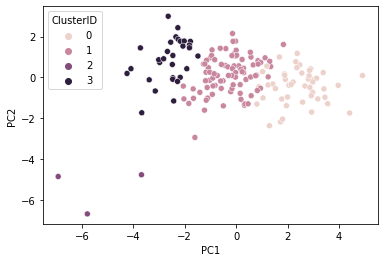

In [431]:
sns.scatterplot(x='PC1',y='PC2',data=df_pca_km,hue='ClusterID')

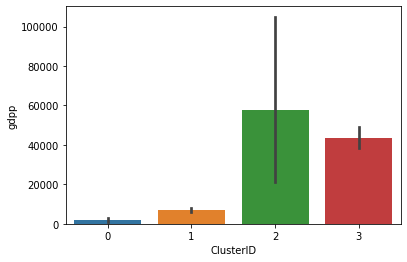

In [436]:
sns.barplot(x=df_pca_km.ClusterID, y=df['gdpp'])
plt.show()